In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def describe_shape(approx):
  x, y, width, height = cv2.boundingRect(approx)

  if len(approx) == 3:
    shape = "Triangle"
  
  elif len(approx) == 4:
    area = width / float(height)
    if area >= 0.95:
      shape = "Square"
    else:
      shape = "Rectangle"
    
  elif len(approx) == 5:
    shape = "Pentagon"
  
  elif len(approx) == 8:
    shape = "Octagon"

  elif 9 < len(approx) < 15:
    shape = "Ellipse"
    
  else:
    shape = "Circle"
  
  return shape, x, y, width, height

In [8]:
orig = cv2.imread('../../samples/3.png', cv2.IMREAD_UNCHANGED)

img = orig.copy()

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur
blur = cv2.GaussianBlur(gray, (5, 5), 1)

# Canny Edge Detection
edges = cv2.Canny(blur, 80, 100)

Contour detected!
3
16911.0


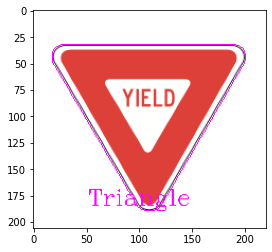

In [9]:
# findContours()
contours, _ = cv2.findContours(
	edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

i = 0

contour_list = []

# list for storing names of shapes
for contour in contours:
    print("Contour detected!")
    # here we are ignoring first counter because
    # findcontour function detects whole image as shape
    # if i == 0:
    #     i = 1
    #     continue
    
    # hull = cv2.convexHull(contour)

    #cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.04 * cv2.arcLength(contour, True), True)

    area = cv2.contourArea(contour)
    print(len(approx))
    print(area)
    # if area > 1:

    shape, x, y, w, h = describe_shape(approx)
    cv2.putText(orig, shape, (x+30, y+150), cv2.FONT_HERSHEY_COMPLEX, .7, (255, 0, 255), 1)
    
    contour_list.append(contour)

cv2.drawContours(orig, contour_list, -1, (255, 0, 255), 1)

# cv2.imwrite('samples/image.png',orig)
# cv2.imshow('resulting', orig)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# opencv (BGR) to matplotlib (RGB) conversion.
plt_img = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)	

plt.imshow(plt_img)
plt.show()